In [1]:
from unicodedata import numeric

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

from plotnine import *

In [7]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/refs/heads/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv'

In [8]:
!wget $data 

--2024-10-12 22:56:44--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/refs/heads/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8000::154, 2606:50c0:8001::154, 2606:50c0:8003::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8000::154|:443... failed: Operation timed out.
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8001::154|:443... ^C


In [2]:
telco_churn_df = pd.read_csv('../../data/03-week/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
telco_churn_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
telco_churn_df.columns = telco_churn_df.columns.str.lower().str.replace(' ', '_')

string_columns = list(telco_churn_df.dtypes[telco_churn_df.dtypes == 'object'].index)

for col in string_columns:
    telco_churn_df[col] = telco_churn_df[col].str.lower().str.replace(' ', '_')

In [5]:
telco_churn_df.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-vhveg,female,0,yes,no,1,no,no_phone_service,dsl,no,...,no,no,no,no,month-to-month,yes,electronic_check,29.85,29.85,no
1,5575-gnvde,male,0,no,no,34,yes,no,dsl,yes,...,yes,no,no,no,one_year,no,mailed_check,56.95,1889.5,no
2,3668-qpybk,male,0,no,no,2,yes,no,dsl,yes,...,no,no,no,no,month-to-month,yes,mailed_check,53.85,108.15,yes
3,7795-cfocw,male,0,no,no,45,no,no_phone_service,dsl,yes,...,yes,yes,no,no,one_year,no,bank_transfer_(automatic),42.30,1840.75,no
4,9237-hqitu,female,0,no,no,2,yes,no,fiber_optic,no,...,no,no,no,no,month-to-month,yes,electronic_check,70.70,151.65,yes


In [7]:
telco_churn_df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

In [9]:
telco_churn_df.totalcharges = pd.to_numeric(telco_churn_df.totalcharges,errors='coerce')

In [10]:
telco_churn_df.totalcharges = telco_churn_df.totalcharges.fillna(0)

In [12]:
telco_churn_df.churn.value_counts()

churn
no     5174
yes    1869
Name: count, dtype: int64

In [13]:
telco_churn_df.churn = (telco_churn_df.churn=='yes').astype(int)

In [14]:
telco_churn_df.churn

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: churn, Length: 7043, dtype: int64

In [15]:
from sklearn.model_selection import train_test_split

In [18]:
telco_churn_full_train, telco_churn_test = train_test_split(telco_churn_df,test_size=0.2,random_state=1)

In [19]:
telco_churn_train,telco_churn_val = train_test_split(telco_churn_full_train,test_size=0.25,random_state=1)

In [22]:
print(len(telco_churn_train)) 
print(len(telco_churn_test))
print(len(telco_churn_val))

4225
1409
1409


In [23]:
telco_churn_train = telco_churn_train.reset_index(drop=True)
telco_churn_val = telco_churn_val.reset_index(drop=True)
telco_churn_test = telco_churn_test.reset_index(drop=True)


In [24]:
y_train = telco_churn_train.churn.values
y_val = telco_churn_val.churn.values
y_test = telco_churn_test.churn.values


In [25]:
telco_churn_train.drop('churn',axis = 1,inplace=True)
telco_churn_val.drop('churn',axis = 1,inplace=True)
telco_churn_test.drop('churn',axis = 1,inplace=True)


### EDA

In [26]:
telco_churn_full_train = telco_churn_full_train.reset_index(drop=1 )

In [27]:
telco_churn_full_train.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [28]:
telco_churn_full_train.churn.value_counts(normalize=True)

churn
0    0.730032
1    0.269968
Name: proportion, dtype: float64

In [29]:
numeric_val = ['tenure','monthlycharges','totalcharges']

categorial_val = ['gender', 'seniorcitizen', 'partner', 'dependents',
               'phoneservice', 'multiplelines', 'internetservice',
               'onlinesecurity', 'onlinebackup', 'deviceprotection',
               'techsupport', 'streamingtv', 'streamingmovies',
               'contract', 'paperlessbilling', 'paymentmethod']

In [30]:
telco_churn_full_train[categorial_val].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

### Feature importance

##### Risk ratio 

In [31]:
telco_churn_full_train.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.70,258.35,0
1,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
2,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,...,no,yes,no,no,two_year,no,bank_transfer_(automatic),65.15,4681.75,0
3,6161-erdgd,male,0,yes,yes,71,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,no,electronic_check,85.45,6300.85,0
4,2364-ufrom,male,0,no,no,30,yes,no,dsl,yes,...,no,yes,yes,no,one_year,no,electronic_check,70.40,2044.75,0


In [36]:
telco_churn_full_train\
        .query("gender=='female'").churn.mean()


0.27682403433476394

In [37]:
telco_churn_full_train \
    .query("gender!='female'").churn.mean()


0.2632135306553911

In [41]:
global_churn = telco_churn_full_train.churn.mean()

In [42]:
global_churn

0.26996805111821087

In [39]:
telco_churn_full_train \
    .query("partner=='yes'").churn.mean()

0.20503330866025166

In [40]:
telco_churn_full_train \
    .query("partner!='yes'").churn.mean()

0.3298090040927694

#####Feature 
1. Global churn vs Group churn
- Group Churn - Global Churn rate  > 0 : More likely importance
- Global Churn - Group Churn rate > 0 : less likely importance
2. Risk Rate: Group/global
- Risk ratio > 1 : More likely importance
- Risk ratio < 1 : Less likely importance


In [44]:
df_group= telco_churn_full_train\
    .groupby('gender')\
    .agg(mean_churn= ('churn','mean'),
         count_churn = ('churn','mean')
         )\
    .assign(
        diff = lambda x:x['mean_churn']-global_churn,
        risk = lambda x:x['mean_churn']/global_churn
)
df_group

,mean_churn,count_churn,diff,risk
gender,,,,
female,0.276824,0.276824,0.006856,1.025396
male,0.263214,0.263214,-0.006755,0.974980


In [ ]:
from IPython.display import  display

In [45]:
for c in categorial_val:
    print(c)
    df_group= telco_churn_full_train\
    .groupby(c)\
    .agg(mean_churn= ('churn','mean'),
         count_churn = ('churn','mean')
         )\
    .assign(
        diff = lambda x:x['mean_churn']-global_churn,
        risk = lambda x:x['mean_churn']/global_churn
)
    display(df_group)
    print()
    print()

gender


,mean_churn,count_churn,diff,risk
gender,,,,
female,0.276824,0.276824,0.006856,1.025396
male,0.263214,0.263214,-0.006755,0.974980




seniorcitizen


,mean_churn,count_churn,diff,risk
seniorcitizen,,,,
0,0.242270,0.242270,-0.027698,0.897403
1,0.413377,0.413377,0.143409,1.531208




partner


,mean_churn,count_churn,diff,risk
partner,,,,
no,0.329809,0.329809,0.059841,1.221659
yes,0.205033,0.205033,-0.064935,0.759472




dependents


,mean_churn,count_churn,diff,risk
dependents,,,,
no,0.313760,0.313760,0.043792,1.162212
yes,0.165666,0.165666,-0.104302,0.613651




phoneservice


,mean_churn,count_churn,diff,risk
phoneservice,,,,
no,0.241316,0.241316,-0.028652,0.893870
yes,0.273049,0.273049,0.003081,1.011412




multiplelines


,mean_churn,count_churn,diff,risk
multiplelines,,,,
no,0.257407,0.257407,-0.012561,0.953474
no_phone_service,0.241316,0.241316,-0.028652,0.893870
yes,0.290742,0.290742,0.020773,1.076948




internetservice


,mean_churn,count_churn,diff,risk
internetservice,,,,
dsl,0.192347,0.192347,-0.077621,0.712482
fiber_optic,0.425171,0.425171,0.155203,1.574895
no,0.077805,0.077805,-0.192163,0.288201




onlinesecurity


,mean_churn,count_churn,diff,risk
onlinesecurity,,,,
no,0.420921,0.420921,0.150953,1.559152
no_internet_service,0.077805,0.077805,-0.192163,0.288201
yes,0.153226,0.153226,-0.116742,0.567570




onlinebackup


,mean_churn,count_churn,diff,risk
onlinebackup,,,,
no,0.404323,0.404323,0.134355,1.497672
no_internet_service,0.077805,0.077805,-0.192163,0.288201
yes,0.217232,0.217232,-0.052736,0.804660




deviceprotection


,mean_churn,count_churn,diff,risk
deviceprotection,,,,
no,0.395875,0.395875,0.125907,1.466379
no_internet_service,0.077805,0.077805,-0.192163,0.288201
yes,0.230412,0.230412,-0.039556,0.853480




techsupport


,mean_churn,count_churn,diff,risk
techsupport,,,,
no,0.418914,0.418914,0.148946,1.551717
no_internet_service,0.077805,0.077805,-0.192163,0.288201
yes,0.159926,0.159926,-0.110042,0.592390




streamingtv


,mean_churn,count_churn,diff,risk
streamingtv,,,,
no,0.342832,0.342832,0.072864,1.269897
no_internet_service,0.077805,0.077805,-0.192163,0.288201
yes,0.302723,0.302723,0.032755,1.121328




streamingmovies


,mean_churn,count_churn,diff,risk
streamingmovies,,,,
no,0.338906,0.338906,0.068938,1.255358
no_internet_service,0.077805,0.077805,-0.192163,0.288201
yes,0.307273,0.307273,0.037305,1.138182




contract


,mean_churn,count_churn,diff,risk
contract,,,,
month-to-month,0.431701,0.431701,0.161733,1.599082
one_year,0.120573,0.120573,-0.149395,0.446621
two_year,0.028274,0.028274,-0.241694,0.104730




paperlessbilling


,mean_churn,count_churn,diff,risk
paperlessbilling,,,,
no,0.172071,0.172071,-0.097897,0.637375
yes,0.338151,0.338151,0.068183,1.252560




paymentmethod


,mean_churn,count_churn,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.168171,0.168171,-0.101797,0.622928
credit_card_(automatic),0.164339,0.164339,-0.105630,0.608733
electronic_check,0.455890,0.455890,0.185922,1.688682
mailed_check,0.193870,0.193870,-0.076098,0.718121


#### Feature importance: Mutual information 

In [46]:
from sklearn.metrics import mutual_info_score

In [47]:
mutual_info_score(telco_churn_full_train.churn,telco_churn_full_train.contract)

0.0983203874041556

In [48]:
def mutual_info_churn_score(series):
    return mutual_info_score(series,telco_churn_full_train.churn)

In [49]:
telco_churn_full_train[categorial_val].apply(mutual_info_churn_score).sort_values(ascending=False)

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

#### Correlation 
Lies between -1 and 1 

-  0 to (+/-) 0.2 : Low Correlation 
-  (+/-) 0.2 to (+/-) 0.5 : Moderate Correlation
-  (+/-) 0.6 to (+/-) 1 : Strong Correlation

In [50]:
telco_churn_full_train[numeric_val].corrwith(telco_churn_full_train.churn)

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

In [59]:
telco_churn_full_train['tenure_cut'] = pd.cut(telco_churn_full_train['tenure'],bins = [-1,0,2,12,np.inf])

/var/folders/hh/8c9bdtz97vs7pb_m1p4ff4wm0000gn/T/ipykernel_20544/4193610922.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


<Axes: xlabel='tenure_cut'>

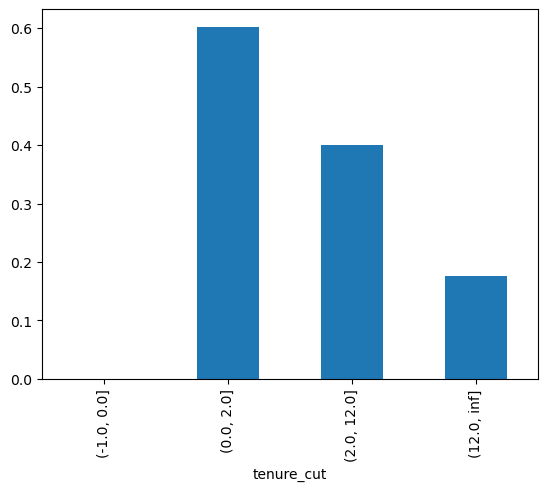

In [64]:
telco_churn_full_train\
    .groupby('tenure_cut')\
    .churn.mean().plot(kind='bar')

In [65]:
telco_churn_full_train['total_charges_cut'] = pd.cut(telco_churn_full_train['totalcharges'],bins = [-1,20,50,np.inf])


/var/folders/hh/8c9bdtz97vs7pb_m1p4ff4wm0000gn/T/ipykernel_20544/3365255264.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


<Axes: xlabel='total_charges_cut'>

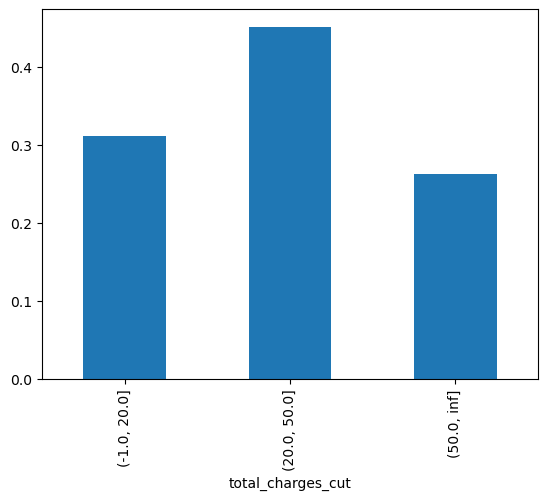

In [69]:
telco_churn_full_train\
    .groupby('total_charges_cut')\
    .churn.mean().plot(kind='bar')

In [70]:
telco_churn_full_train['monthlycharges_cut'] = pd.cut(telco_churn_full_train['monthlycharges'],bins = [-1,20,50,np.inf])


/var/folders/hh/8c9bdtz97vs7pb_m1p4ff4wm0000gn/T/ipykernel_20544/4123372329.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


<Axes: xlabel='monthlycharges_cut'>

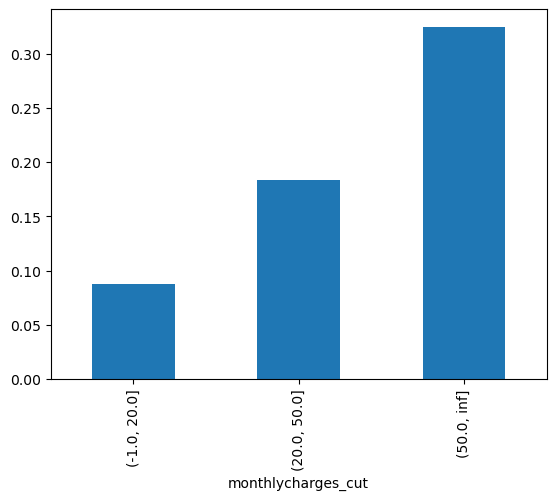

In [71]:
telco_churn_full_train\
    .groupby('monthlycharges_cut')\
    .churn.mean().plot(kind='bar')

Conclusion :
- Tenure has negative correlation 
- Monthly rates has positive correlation 

### One -hot encoding 

In [72]:
from sklearn.preprocessing import OneHotEncoder

In [73]:
from sklearn.feature_extraction import DictVectorizer

In [74]:
telco_churn_full_train[['gender','contract']].iloc[:10]

,gender,contract
0,male,two_year
1,female,one_year
2,male,two_year
3,male,one_year
4,male,one_year
5,female,month-to-month
6,male,two_year
7,male,month-to-month
8,male,month-to-month
9,female,month-to-month


In [78]:
dicts = telco_churn_full_train[['gender','contract']].iloc[:10].to_dict(orient='records')

In [81]:
dv = DictVectorizer(sparse=False)
dv.fit(dicts)

DictVectorizer(sparse=False)

In [83]:
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'gender=female', 'gender=male'], dtype=object)

In [82]:
dv.transform(dicts)

array([[0., 0., 1., 0., 1.],
       [0., 1., 0., 1., 0.],
       [0., 0., 1., 0., 1.],
       [0., 1., 0., 0., 1.],
       [0., 1., 0., 0., 1.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 0., 1.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0.]])

In [85]:
train_dict = telco_churn_train[categorial_val + numeric_val].to_dict(orient='records')

In [86]:
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

DictVectorizer(sparse=False)

In [89]:
X_train = dv.transform(train_dict)

In [90]:
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'dependents=no', 'dependents=yes',
       'deviceprotection=no', 'deviceprotection=no_internet_service',
       'deviceprotection=yes', 'gender=female', 'gender=male',
       'internetservice=dsl', 'internetservice=fiber_optic',
       'internetservice=no', 'monthlycharges', 'multiplelines=no',
       'multiplelines=no_phone_service', 'multiplelines=yes',
       'onlinebackup=no', 'onlinebackup=no_internet_service',
       'onlinebackup=yes', 'onlinesecurity=no',
       'onlinesecurity=no_internet_service', 'onlinesecurity=yes',
       'paperlessbilling=no', 'paperlessbilling=yes', 'partner=no',
       'partner=yes', 'paymentmethod=bank_transfer_(automatic)',
       'paymentmethod=credit_card_(automatic)',
       'paymentmethod=electronic_check', 'paymentmethod=mailed_check',
       'phoneservice=no', 'phoneservice=yes', 'seniorcitizen',
       'streamingmovies=no', 'streamingmovies=no_internet_service',

In [91]:
val_dicts = telco_churn_val[categorial_val + numeric_val].to_dict(orient='records')

X_val = dv.transform(val_dicts)

### Logistics Regressions

In [94]:
def sigmoid(z):
    return 1/ (1 + np.exp(-z))

In [93]:
z = np.linspace(-7,7,51)
z 

array([-7.0000000e+00, -6.7200000e+00, -6.4400000e+00, -6.1600000e+00,
       -5.8800000e+00, -5.6000000e+00, -5.3200000e+00, -5.0400000e+00,
       -4.7600000e+00, -4.4800000e+00, -4.2000000e+00, -3.9200000e+00,
       -3.6400000e+00, -3.3600000e+00, -3.0800000e+00, -2.8000000e+00,
       -2.5200000e+00, -2.2400000e+00, -1.9600000e+00, -1.6800000e+00,
       -1.4000000e+00, -1.1200000e+00, -8.4000000e-01, -5.6000000e-01,
       -2.8000000e-01,  8.8817842e-16,  2.8000000e-01,  5.6000000e-01,
        8.4000000e-01,  1.1200000e+00,  1.4000000e+00,  1.6800000e+00,
        1.9600000e+00,  2.2400000e+00,  2.5200000e+00,  2.8000000e+00,
        3.0800000e+00,  3.3600000e+00,  3.6400000e+00,  3.9200000e+00,
        4.2000000e+00,  4.4800000e+00,  4.7600000e+00,  5.0400000e+00,
        5.3200000e+00,  5.6000000e+00,  5.8800000e+00,  6.1600000e+00,
        6.4400000e+00,  6.7200000e+00,  7.0000000e+00])

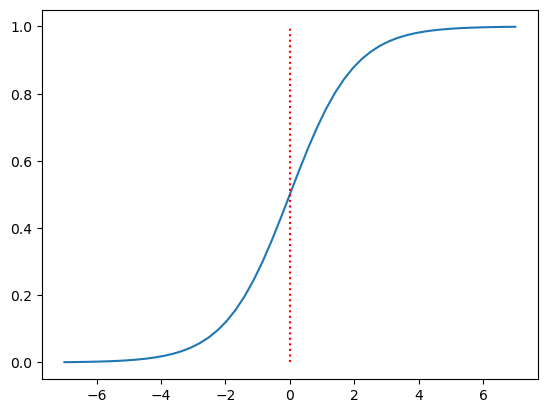

In [101]:
plt.plot(z , sigmoid(z))
plt.vlines(x=0,ymin=0,ymax=1,linestyles = "dotted",color = 'r')

### Training with sklearn 

In [102]:
from sklearn.linear_model import LogisticRegression

In [103]:
lr_model = LogisticRegression()


In [104]:
lr_model.fit(X_train,y_train)

LogisticRegression()

In [107]:
lr_model.intercept_[0].round(3)

-0.109

In [106]:
lr_model.coef_[0].round(3)

array([ 0.475, -0.175, -0.408, -0.03 , -0.078,  0.063, -0.089, -0.081,
       -0.034, -0.073, -0.335,  0.317, -0.089,  0.004, -0.258,  0.141,
        0.009,  0.063, -0.089, -0.081,  0.266, -0.089, -0.284, -0.231,
        0.124, -0.166,  0.058, -0.087, -0.032,  0.071, -0.059,  0.141,
       -0.249,  0.215, -0.12 , -0.089,  0.102, -0.071, -0.089,  0.052,
        0.213, -0.089, -0.232, -0.07 ,  0.   ])

In [117]:
lr_model.predict(X_val) ## hard prediction

array([0, 0, 0, ..., 0, 1, 1])

In [118]:
y_pred = lr_model.predict_proba(X_val)[:,1]  ## soft prediction

In [119]:
churn_decision = y_pred >=0.5

In [120]:
churn_decision

array([False, False, False, ..., False,  True,  True])

In [122]:
telco_churn_val[churn_decision].head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges
3,8433-wxgna,male,0,no,no,2,yes,no,fiber_optic,yes,no,no,no,no,no,month-to-month,yes,electronic_check,75.70,189.20
8,3440-jpscl,female,0,no,no,6,yes,no,fiber_optic,no,no,yes,yes,yes,yes,month-to-month,yes,mailed_check,99.95,547.65
11,2637-fkfsy,female,0,yes,no,3,yes,no,dsl,no,no,no,no,no,no,month-to-month,yes,mailed_check,46.10,130.15
12,7228-omtpn,male,0,no,no,4,yes,no,fiber_optic,no,no,no,no,yes,yes,month-to-month,yes,electronic_check,88.45,370.65
19,6711-fldfb,female,0,no,no,7,yes,yes,fiber_optic,no,no,no,no,no,no,month-to-month,yes,electronic_check,74.90,541.15


In [123]:
(y_val==churn_decision.astype(int)).mean()

0.8034066713981547

### Model interception 

In [125]:
dict(zip(dv.get_feature_names_out(),lr_model.coef_[0].round(3)))

{'contract=month-to-month': 0.475,
 'contract=one_year': -0.175,
 'contract=two_year': -0.408,
 'dependents=no': -0.03,
 'dependents=yes': -0.078,
 'deviceprotection=no': 0.063,
 'deviceprotection=no_internet_service': -0.089,
 'deviceprotection=yes': -0.081,
 'gender=female': -0.034,
 'gender=male': -0.073,
 'internetservice=dsl': -0.335,
 'internetservice=fiber_optic': 0.317,
 'internetservice=no': -0.089,
 'monthlycharges': 0.004,
 'multiplelines=no': -0.258,
 'multiplelines=no_phone_service': 0.141,
 'multiplelines=yes': 0.009,
 'onlinebackup=no': 0.063,
 'onlinebackup=no_internet_service': -0.089,
 'onlinebackup=yes': -0.081,
 'onlinesecurity=no': 0.266,
 'onlinesecurity=no_internet_service': -0.089,
 'onlinesecurity=yes': -0.284,
 'paperlessbilling=no': -0.231,
 'paperlessbilling=yes': 0.124,
 'partner=no': -0.166,
 'partner=yes': 0.058,
 'paymentmethod=bank_transfer_(automatic)': -0.087,
 'paymentmethod=credit_card_(automatic)': -0.032,
 'paymentmethod=electronic_check': 0.071,


### Using the models

In [128]:
dicts_full = telco_churn_full_train[categorial_val + numeric_val].to_dict(orient = 'records')
dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full)
y_full_train = telco_churn_full_train.churn.values
dicts_test = telco_churn_test[categorial_val + numeric_val].to_dict(orient = 'records')

X_test = dv.fit_transform(dicts_test)

In [129]:
lr_full_model = LogisticRegression()
lr_full_model.fit(X_full_train,y_full_train)

LogisticRegression()

In [130]:
y_pred = lr_full_model.predict_proba(X_test)[:,1]


In [131]:
churn_decision = (y_pred >=0.5)

In [132]:
(churn_decision ==y_test).mean()

0.815471965933286